In [ ]:
# KNN
# k-nearest neighbor
# 인스턴스 기반 모델 (데이터가 있어야 함)
# heuristic하게 k값을 결정(3,5,7,9,...) 길 찾기 로직: grid
# 비선형데이터에 강건( 어떤 형태를 하고 있더라도 유리 )

(1, 5)
1==> [5.1 2.2]
2==> [3.8 3.7]
3==> [3.4 1.9]
4==> [2.9 2.5]
5==> [5.7 3.5]


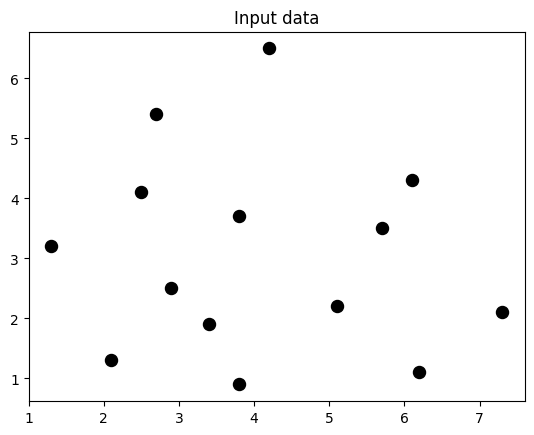

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors 
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9], 
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])

k=5
test_datapoint=[4.3,2.7]
plt.figure()
plt.title('Input data')
plt.scatter(X[:,0],X[:,1],marker='o',s=75,color='black')

knn_model=NearestNeighbors(n_neighbors=k,algorithm='ball_tree').fit(X)
distances,indices=knn_model.kneighbors([test_datapoint])
print(indices.shape)
for rank,index in enumerate(indices[0][:k],start=1):
  print(str(rank)+'==>',X[index])

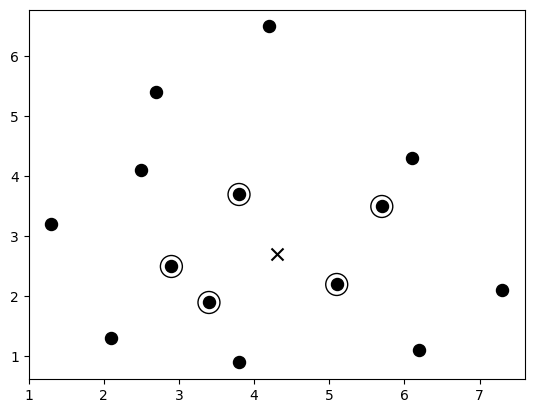

In [4]:
plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',s=75,color='k')
plt.scatter(X[indices][0][:][:,0],X[indices][0][:][:,1],
            marker='o',s=250,color='k',facecolors='none')
plt.scatter(test_datapoint[0],test_datapoint[1],
            marker='x',s=75,color='k')
plt.show()

In [9]:
import matplotlib.cm as cm
from sklearn import neighbors, datasets

input_file='/content/drive/MyDrive/daejeon_1/data.txt'
data=np.loadtxt(input_file,delimiter=',')
X,y=data[:,:-1],data[:,-1].astype(np.int)
print(X.shape)

(300, 2)


<ipython-input-9-05182b95e24a>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X,y=data[:,:-1],data[:,-1].astype(np.int)


In [23]:
# 문제
# y값의 종류가 몇개인가
print(np.unique(y))
set(y) # list,tuple,dict,set(중복을 허용하지 않는 데이터)

[0 1 2 3]


{0, 1, 2, 3}

In [25]:
# X값은 몇차원
# X의 5개 값을 출력해보시오
# X.head() # numpy.ndarray여서 안됨 
X[:5]

array([[1.77, 2.67],
       [3.72, 4.03],
       [6.66, 2.89],
       [8.51, 1.98],
       [0.53, 2.98]])

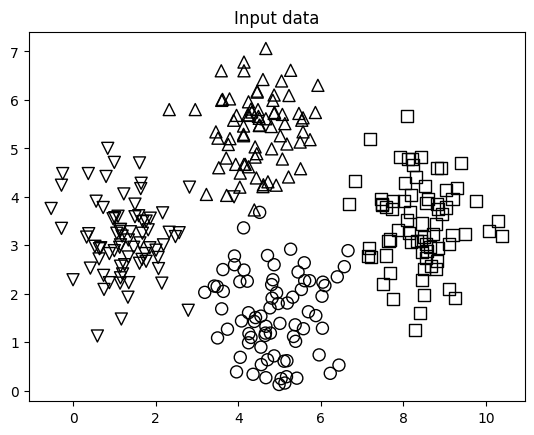

In [10]:
plt.figure()
plt.title('Input data')
marker_shapes='v^os'
mapper=[marker_shapes[i] for i in y]
for i in range(X.shape[0]):
  plt.scatter(X[i,0],X[i,1],marker=mapper[i],
              s=75,edgecolors='black',facecolors='none')

In [14]:
num_neighbors=12
classifier=neighbors.KNeighborsClassifier(num_neighbors,weights='distance')
classifier.fit(X,y)

KNeighborsClassifier(n_neighbors=12, weights='distance')

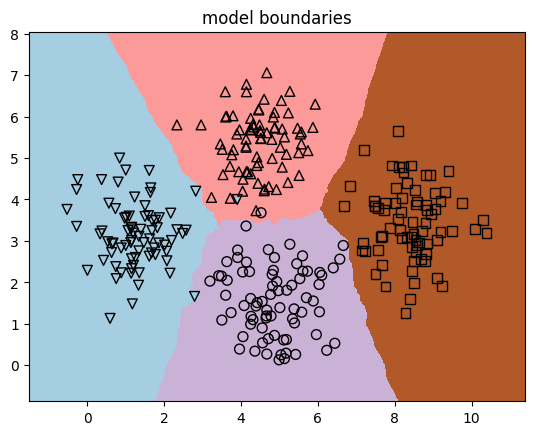

In [15]:
# 한계값보다 더 폭이 넓게 표현
# np.meshgrid 정점좌표를 결정
# c_데이터를 컬럼으로 합쳐라
# pandas에서는 row stack
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
step_size=0.01
# x,y 좌표가 생성

x_values,y_values = np.meshgrid(np.arange(x_min,x_max,step_size),np.arange(y_min,y_max,step_size))
output=classifier.predict(np.c_[x_values.ravel(),y_values.ravel()])
output=output.reshape(x_values.shape)

plt.figure()
# 예측 번호를 컬러번호와 매핑해서 색을 칠함
# cmap으로 컬러 종류를 결정, output으로 컬러 번호를 결정
plt.pcolormesh(x_values,y_values,output,cmap=cm.Paired)

for i in range(X.shape[0]):
  plt.scatter(X[i,0],X[i,1],marker=mapper[i],
              s=50,edgecolors='black',facecolors='none')
plt.xlim(x_values.min(),x_values.max())
plt.ylim(y_values.min(),y_values.max())
plt.title('model boundaries')

test_datapoint=[5.1,3.6]
# 12개의 이웃을 찾는 것: 탐색

In [16]:
_, indices=classifier.kneighbors([test_datapoint])
indices.shape

(1, 12)

In [53]:
# 문제
# 1x12의 12개의 인덱스를 출력하시오

print(indices)

[[270 289 226 257 277  21 221  77 170 166  10 273]]


In [30]:
# 문제
# test_datapoint로 부터 12개의 데이터간의 거리값을 출력하시오 

print(_) # 거리 값

[[0.58549125 0.66483081 0.70092796 0.7218033  0.78873316 0.80529498
  0.81400246 0.81884064 0.89899944 0.99924972 1.02610916 1.02941731]]


In [43]:
# 문제
# test_datapoint와 289인덱스에 있는 데이터의 실제 거리값을 계산해서 0.66483081 인지 확인
print(test_datapoint)
print(X[289,:])

np.sqrt(sum((test_datapoint-X[289,:])**2)) # 0.6648308055437865

[5.1, 3.6]
[4.92 4.24]


0.6648308055437865

In [50]:
# 어떻게 1로 결정되었는지 확인해보기

print(classifier.predict([test_datapoint])[0]) # 투표 -> 도수분포표
print(y[indices[0]]) # 1:7개 , 2:5개

# pandas에서 도수 분포표 values_count()
# data.unique()
np.unique(y[indices[0]],return_counts=True)

1
[2 1 2 1 1 1 1 1 2 2 2 1]


(array([1, 2]), array([7, 5]))

In [69]:
# 훈련된 데이터를 이용해서 학습정확도가 얼마인지 확인
# 내가한거
y_pred=classifier.predict(X)
accuracy=np.sum(y_pred==y)/y.shape[0]
print('accuracy = ', accuracy)

classifier.score(X,y)

accuracy =  1.0


1.0

In [71]:
# indices[0]에 들어 있는 데이터에 대하여 예측된 값을 출력해보시오
y_pred[indices[0]]

array([2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1])

In [74]:
# indices[0]에 있는 데이터 중에 6번째 있는 데이터에 대하여 예측해보시오
y_pred[indices[0][6]]

1

(87, 65)


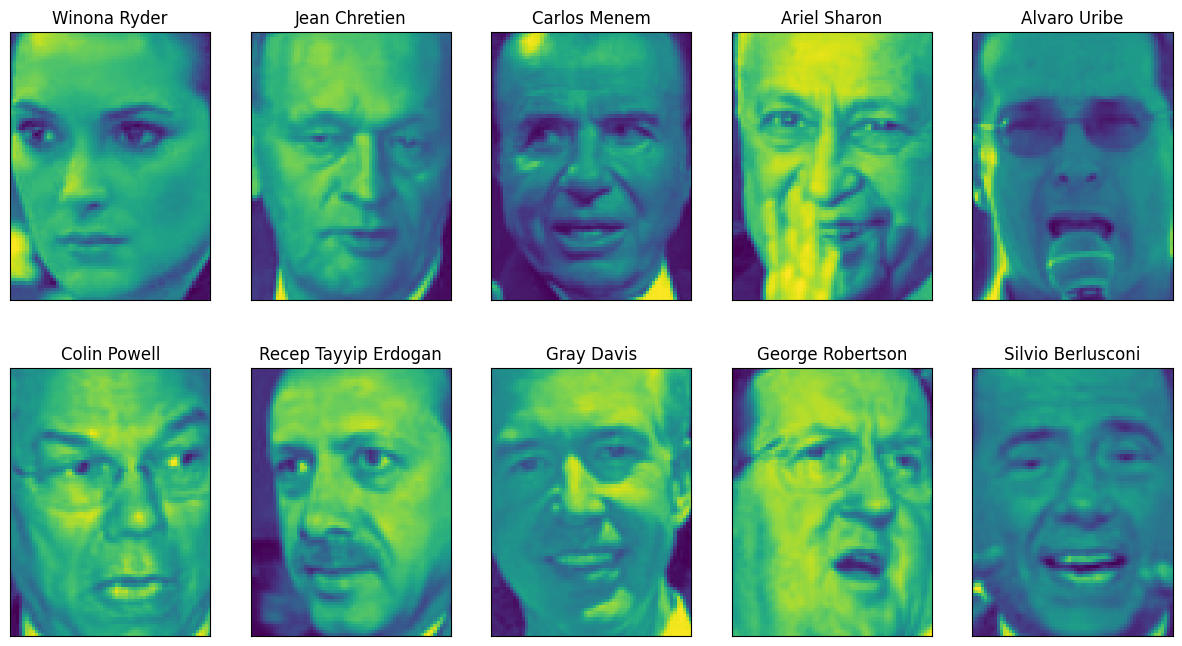

In [77]:
# knn 이미지 적
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape
print(image_shape)
fig,axes=plt.subplots(2,5,figsize=(15,8),
                      subplot_kw={'xticks':(),'yticks':()})
for target,image, ax in zip(people.target,people.images,axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [78]:
people.target[0:10],people.target_names[people.target[0:10]]
print('people.images.shape: {}'.format(people.images.shape))
print('클래스개수: {}'.format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스개수: 62


In [82]:
# 문제
# 이미지 장 수와 사람 수를 확인해 보시오
people.target.shape
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [84]:
# 도수 분포표
counts=np.bincount(people.target) 0~61까지 도수분포표로 구성 
for i,(count,name) in enumerate(zip(counts,people.target_names)):
  print('{0:25}{1:3}'.format(name,count),end='   ')
  if (i+1)%3==0:
    print()

Alejandro Toledo          39   Alvaro Uribe              35   Amelie Mauresmo           21   
Andre Agassi              36   Angelina Jolie            20   Ariel Sharon              77   
Arnold Schwarzenegger     42   Atal Bihari Vajpayee      24   Bill Clinton              29   
Carlos Menem              21   Colin Powell             236   David Beckham             31   
Donald Rumsfeld          121   George Robertson          22   George W Bush            530   
Gerhard Schroeder        109   Gloria Macapagal Arroyo   44   Gray Davis                26   
Guillermo Coria           30   Hamid Karzai              22   Hans Blix                 39   
Hugo Chavez               71   Igor Ivanov               20   Jack Straw                28   
Jacques Chirac            52   Jean Chretien             55   Jennifer Aniston          21   
Jennifer Capriati         42   Jennifer Lopez            21   Jeremy Greenstock         24   
Jiang Zemin               20   John Ashcroft             53 

In [85]:
# 이미지 장수만
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target): # 62명에 대하여 
  mask[np.where(people.target==target)[0][:50]]=1 # 50개의 이미지로 통일
X_people=people.data[mask] # boolean indexing
y_people=people.target[mask]
X_people=X_people/255.

<ipython-input-85-56e31aa23d38>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros(people.target.shape,dtype=np.bool)


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X_people,y_people,stratify=y_people,random_state=0)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print('1-최근접 이웃의 테스트 세트 점수: {:.2f}'.format(knn.score(X_test,y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.22


In [88]:
X_train.shape # 5655 변수의 개수 -> 고차원
# bias,variance -> bias에러는 줄어들고 variance는 늘어남
# 차원축소

(1547, 5655)

In [87]:
# PCA
# 원본데이터에 대한 상관계수 행렬, 공분산 행렬
# 정방행렬, 대칭행렬
# 고유값 분해
# 고유값 고유벡터
# 고유벡터는 정직교 벡터고 분산의 크기가 고유값
# 출력할 때 이미 정렬이 되어서 출력
# n_components(100개) 분산이 큰 변수만 남

from sklearn.decomposition import PCA
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)

X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print('훈련차원: {}'.format(X_train_pca.shape))

훈련차원: (1547, 100)


In [89]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print('테스트 세트 정확도: {:.2f}'.format(knn.score(X_test_pca,y_test)))

테스트 세트 정확도: 0.30


In [ ]:
# 100개의 주성분으로 이루어진 데이터로부터 원본이미지 복원
# 이미지의 특징행렬중에 15번까지의 특징 행렬에 대한 이미지 
fig,axes=plt.subplots(3,5,figsize=(15,12),
                      subplot_kw={'xticks':(),'yticks':()})
# 5655 * 5655 => 100번 =>100개의 특징으로 이미지를 판별
# 5655 * 100 가중치 행
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
  ax.imshow(component.reshape(image_shape),cmap='viridis')
  ax.set_title('PCA component {}'.format((i+1)))

In [ ]:
# 컴포넌트 10개, 50개, 100개, 500개를 이용해서 이미지로 역변환
reduced_images=[]
for n_components in [10,50,100,500]:
  pca=PCA(n_components=n_components) # 10개의 축 # 고유벡터 5655*5655(10) => component
  # 원본 이미지(87*65 => 5655) @ (5655*10) => 10 정직교하는 좌표계에서 특징이 추출
  pca.fit(X_train)
  X_test_pca=pca.transform(X_test) # 5655 => 10
  print(X_test_pca.shape)
  # 10@(10x5655)
  X_test_back=pca.inverse_transform(X_test_pca) # 10 => 5655로 돌아가
  reduced_images.append(X_test_back)
fix,axes=plt.subplots(3,5,figsize=(15,12),
                      subplot_kw={'xticks':(),'yticks':()})
for i,ax in enumerate(axes):
  ax[0].imshow(X_test[i].reshape(image_shape))
  for a,X_test_back in zip(ax[1:],reduced_images):
    a.imshow(X_test_back[i].reshape(image_shape))

axes[0,0].set_title('original image')
for ax,n_components in zip(axes[0,1:],[10,50,100,500]):
  ax.set_title('recovery as %d feature' % n_components)


In [100]:
# 문제
# (20,30,90)
# (80,44,40)
# 두 벡터의 거리값을 구하시오
# 두 벡터의 내적을 구하시오
# 두 벡터의 방향값을 구하시오
import numpy as np

a=np.array([20,30,90])
b=np.array([80,44,40])
dot_product=np.dot(a,b)
norm_a=np.linalg.norm(a)
norm_b=np.linalg.norm(b)
distance= sum((a-b)**2)**(1/2)
print('distance = ',distance)
print('내적 = ', dot_product)
angle = np.arccos(dot_product / (norm_a * norm_b))
direction_a = a/np.linalg.norm(a)
direction_b = b/np.linalg.norm(b)
print('a 방향값 = ',direction_a)
print('b 방향값 = ',direction_b)
print('사이각 = ', angle)

distance =  79.3473376995095
내적 =  6520
a 방향값 =  [0.20628425 0.30942637 0.92827912]
b 방향값 =  [0.80257235 0.44141479 0.40128618]
사이각 =  0.8303072556381692


In [104]:
import numpy as np
a_64 = np.array([61.22, 71.60, -65.755], dtype=np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype=np.float64)

In [105]:
np.sqrt(np.sum((a_64 - b_64) **2))

0.035902646142031334

In [106]:
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype=np.float64)
dist_64_np

array([0.03590265])

In [107]:
from sklearn import metrics
dist_64_sklearn=metrics.pairwise.pairwise_distances([a_64],[b_64],metric='euclidean')
dist_64_sklearn

array([[0.03590265]])

In [108]:
dist_64_sklearn=metrics.pairwise.pairwise_distances([a_64],[b_64],metric='l1')

In [109]:
dist_64_sklearn=metrics.pairwise.pairwise_distances([a_64],[b_64],metric='l2')

In [110]:
dist_64_sklearn=metrics.pairwise.pairwise_distances([a_64],[b_64],metric='manhattan')

In [ ]:
# kmeans # 비지도 학습, 라벨링, 대분류, 원형이상치 제거, 벡터 양자화 (압축)
# 중심기반 알고리즘 
# k, 중심을 결정
# k개의 중심 결정, 중심과의 거리 (1개의 데이터는 중심개수만큼 거리값을 계산)
# 데이터 포인트 : 50 * 그룹이 3 = 150번 계산
# 가장 가까운 그룹에 배치 
# 중심값을 재계산
# 중심과의 거리값 계산

In [111]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
iris = datasets.load_iris() 
X=iris.data[:,:2]
y_iris=iris.target
km2=cluster.KMeans(n_clusters=2).fit(X) # heuristic하게 결정 WSS값으로 엘보우로 판단
km3=cluster.KMeans(n_clusters=3).fit(X)
km4=cluster.KMeans(n_clusters=4).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K=4,J=28.21')

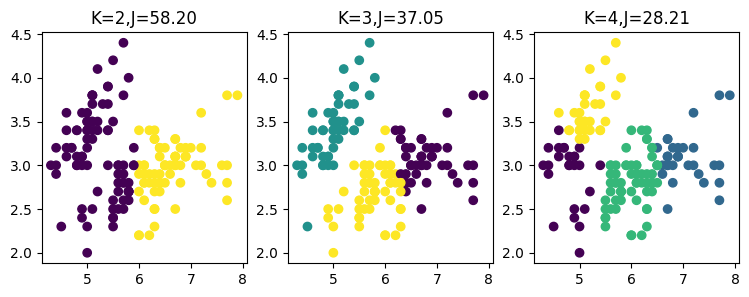

In [113]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c=km2.labels_)
plt.title('K=2,J=%.2f' % km2.inertia_) # 그룹내 거리 값 

plt.subplot(132)
plt.scatter(X[:,0],X[:,1],c=km3.labels_)
plt.title('K=3,J=%.2f' % km3.inertia_)

plt.subplot(133)
plt.scatter(X[:,0],X[:,1],c=km4.labels_)
plt.title('K=4,J=%.2f' % km4.inertia_)

In [115]:
km4.cluster_centers_

array([[4.792     , 2.896     ],
       [7.03225806, 3.08709677],
       [6.01129032, 2.80806452],
       [5.1875    , 3.6375    ]])

In [116]:
km3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [117]:
km3.inertia_

37.05070212765956